# Data exploration in Python

We start by loading a few useful Python packages.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Figure sizes
plt.rcParams['figure.figsize'] = [8,6]

We now load the dataset that will be used throughout the course: the Jura dataset. It comprises seven heavy metals measured in the top soil of the swiss Jura, along with consistently coded land use and rock type factors, as well as geographic coordinates. Here is the description of the rocktypes and Land uses:

- Rock Types: 1: Argovian, 2: Kimmeridgian, 3: Sequanian, 4: Portlandian, 5: Quaternary.

- Land uses: 1: Forest, 2: Pasture (Weide(land), Wiese, Grasland), 3: Meadow (Wiese, Flur, Matte, Anger), 4: Tillage (Ackerland, bestelltes Land)


1. Load the dataset from the file *jura_pred.csv* (on the cloud) using the Pandas library.

In [3]:
# Dataset
jura=pd.read_csv("jura/jura_pred.csv")

2. What is the class of the dataset?

In [4]:
type(jura)

pandas.core.frame.DataFrame

3. What is the number of observations? What is the number of variables?

In [5]:
jura.shape

(259, 11)

3. Print the name of the variables.

In [6]:
jura.columns.values

array(['Xloc', 'Yloc', 'Landuse', 'Rock', 'Cd', 'Co', 'Cr', 'Cu', 'Ni',
       'Pb', 'Zn'], dtype=object)

4. Compute the minimum and maximum value for each coordinate.

In [7]:
## Here are two ways to compute the minimum of each coordinate
res= [jura['Xloc'].min(), jura['Yloc'].min()]
print("\n Min - 1st way :\n ", res)

res=jura[['Xloc','Yloc']].min(0)
print("\n Min - 2nd way :\n", res)

## Likewise for the maximum
res=[jura['Xloc'].max(), jura['Yloc'].max()]
print("\n Max - 1st way :\n", res)

res=jura[['Xloc','Yloc']].max(0)
print("\n Max - 2nd way :\n", res)


 Min - 1st way :
  [np.float64(0.626), np.float64(0.58)]

 Min - 2nd way :
 Xloc    0.626
Yloc    0.580
dtype: float64

 Max - 1st way :
 [np.float64(4.92), np.float64(5.69)]

 Max - 2nd way :
 Xloc    4.92
Yloc    5.69
dtype: float64


5. Compute basic statistics for the seven different heavy metals (mean, min, max, quartiles and standard deviation)

In [8]:
## 1st way: using the describe method of Pandas dataframes
res=jura.iloc[:,4:].describe()

print("With the describe method:")
print(res)

With the describe method:
               Cd          Co          Cr          Cu          Ni          Pb  \
count  259.000000  259.000000  259.000000  259.000000  259.000000  259.000000   
mean     1.309077    9.302579   35.070116   23.727490   19.730347   53.916602   
std      0.915188    3.576046   10.957509   20.712635    8.232858   29.792158   
min      0.135000    1.552000    8.720000    3.960000    4.200000   18.960000   
25%      0.637500    6.520000   27.440000   11.020000   13.800000   36.520000   
50%      1.070000    9.760000   34.840000   17.600000   20.560000   46.400000   
75%      1.715000   11.980000   42.220000   27.820000   25.420000   60.400000   
max      5.129000   17.720000   67.600000  166.400000   53.200000  229.560000   

               Zn  
count  259.000000  
mean    75.078301  
std     29.019291  
min     25.200000  
25%     55.000000  
50%     73.560000  
75%     89.920000  
max    219.320000  


In [9]:
## 2nd way: manually
res_min=jura.iloc[:,4:].min(0)
res_max=jura.iloc[:,4:].max(0)
res_mean=jura.iloc[:,4:].mean(0)
res_std=jura.iloc[:,4:].std(0)
res_quartile_25=jura.iloc[:,4:].quantile(0.25)
res_quartile_50=jura.iloc[:,4:].quantile(0.5)
res_quartile_75=jura.iloc[:,4:].quantile(0.75)

print("Min\n",res_quartile_25)

Min
 Cd     0.6375
Co     6.5200
Cr    27.4400
Cu    11.0200
Ni    13.8000
Pb    36.5200
Zn    55.0000
Name: 0.25, dtype: float64


6. Compute the mean cobalt concentration for the four different landuses 

In [10]:
mean_Co_1=jura['Co'][jura['Landuse']==1].mean()
mean_Co_2=jura['Co'][jura['Landuse']==2].mean()
mean_Co_3=jura['Co'][jura['Landuse']==3].mean()
mean_Co_4=jura['Co'][jura['Landuse']==4].mean()
print([mean_Co_1,mean_Co_2,mean_Co_3,mean_Co_4])

[np.float64(7.694545454545455), np.float64(10.064285714285713), np.float64(9.393866666666666), np.float64(8.372000000000002)]


### Graphical Representations


1. Plot the points in the dataset using their coordinates 'Xloc' and 'Yloc'.

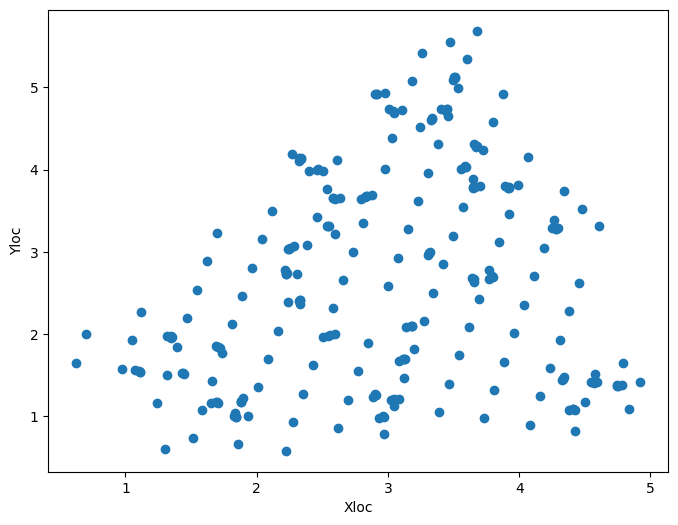

In [11]:
plt.scatter(jura['Xloc'],jura['Yloc'])
plt.xlabel('Xloc')
plt.ylabel('Yloc')
plt.show()

2. On the same plot, display the points with landuse 2 (pasture) in red.

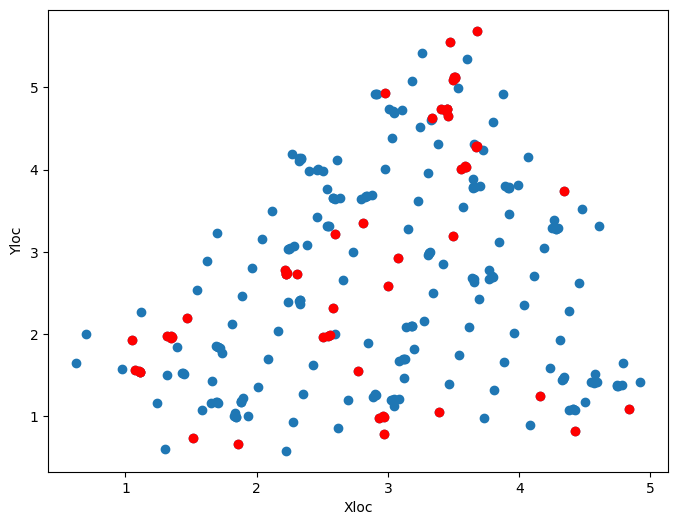

In [12]:
plt.scatter(jura['Xloc'],jura['Yloc'])
plt.scatter(jura['Xloc'][jura['Landuse']==2],jura['Yloc'][jura['Landuse']==2],color="red")
plt.xlabel('Xloc')
plt.ylabel('Yloc')
plt.show()

3. Plot the seven, heavy metal concentrations histograms.

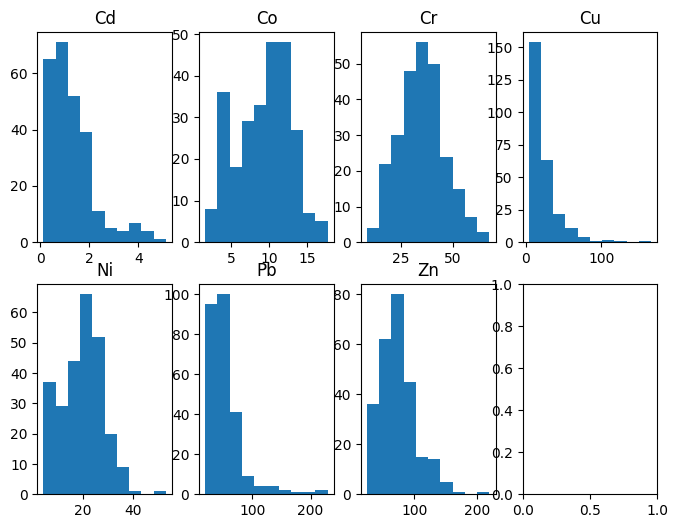

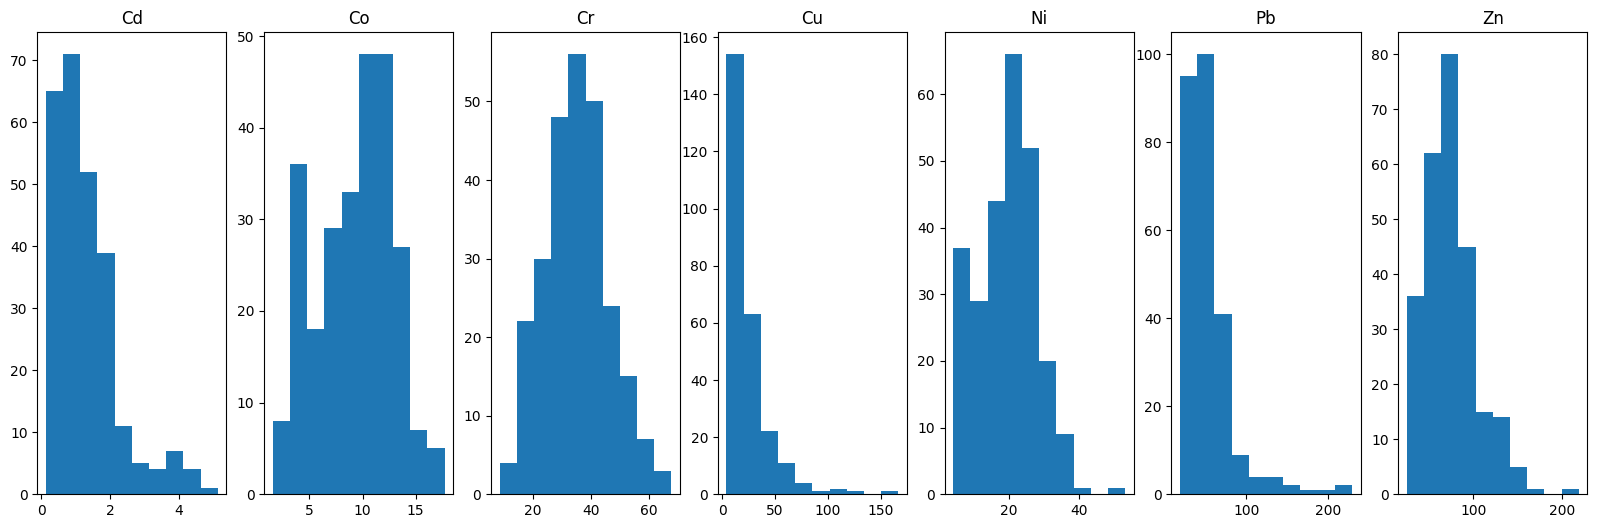

In [13]:
## Manually, on a grid
fig,ax = plt.subplots(nrows=2,ncols=4) ## To create a grid of plots
ax[0,0].hist(jura['Cd']) 
ax[0,0].set_title('Cd')
ax[0,1].hist(jura['Co']) 
ax[0,1].set_title('Co')
ax[0,2].hist(jura['Cr'])
ax[0,2].set_title('Cr')
ax[0,3].hist(jura['Cu']) 
ax[0,3].set_title('Cu')
ax[1,0].hist(jura['Ni']) 
ax[1,0].set_title('Ni')
ax[1,1].hist(jura['Pb']) 
ax[1,1].set_title('Pb')
ax[1,2].hist(jura['Zn']) 
ax[1,2].set_title('Zn')
plt.show()

## With a loop, on a single line
metal_names=jura.columns.values[4:]
fig,ax = plt.subplots(nrows=1,ncols=len(metal_names),figsize=(20,6)) ## To create a grid of plots
for i in range(len(metal_names)):
    name=metal_names[i]
    ax[i].hist(jura[name]) 
    ax[i].set_title(name)
plt.show()

4. Plot the seven heavy metal concentrations as functions of the landuse

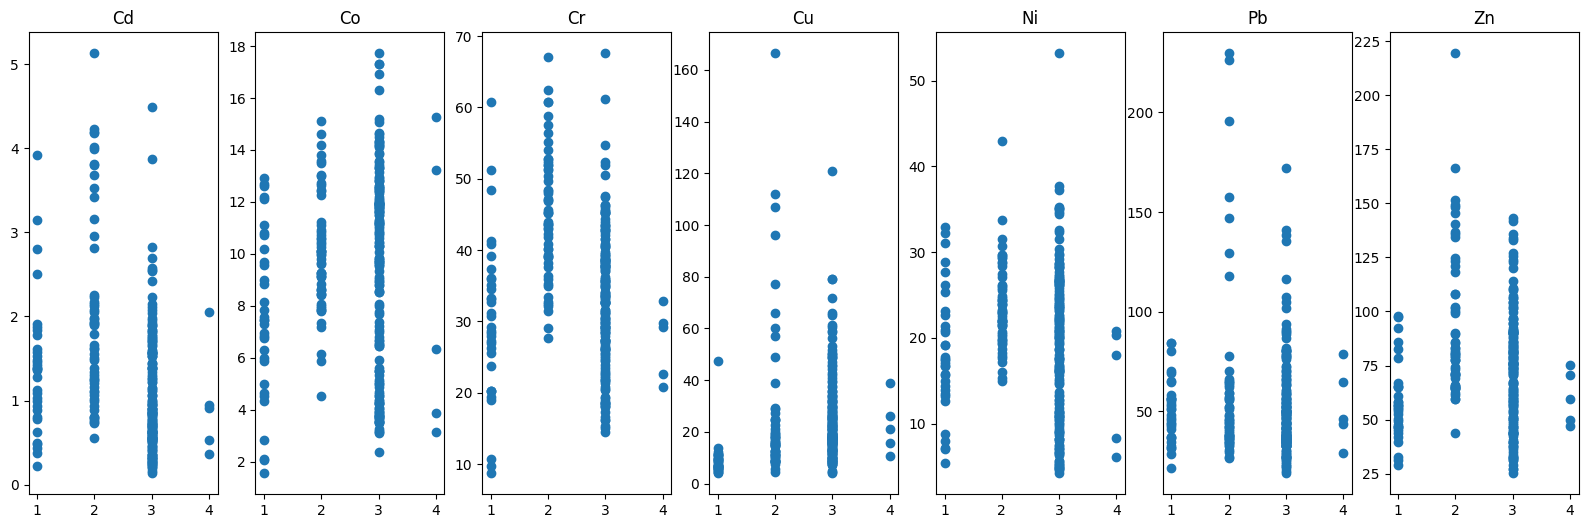

In [14]:
## With a loop, on a single line
metal_names=jura.columns.values[4:]
fig,ax = plt.subplots(nrows=1,ncols=len(metal_names),figsize=(20,6)) ## To create a grid of plots
for i in range(len(metal_names)):
    name=metal_names[i]
    ax[i].scatter(jura['Landuse'],jura[name]) 
    ax[i].set_title(name)
plt.show()

Same but with boxplots

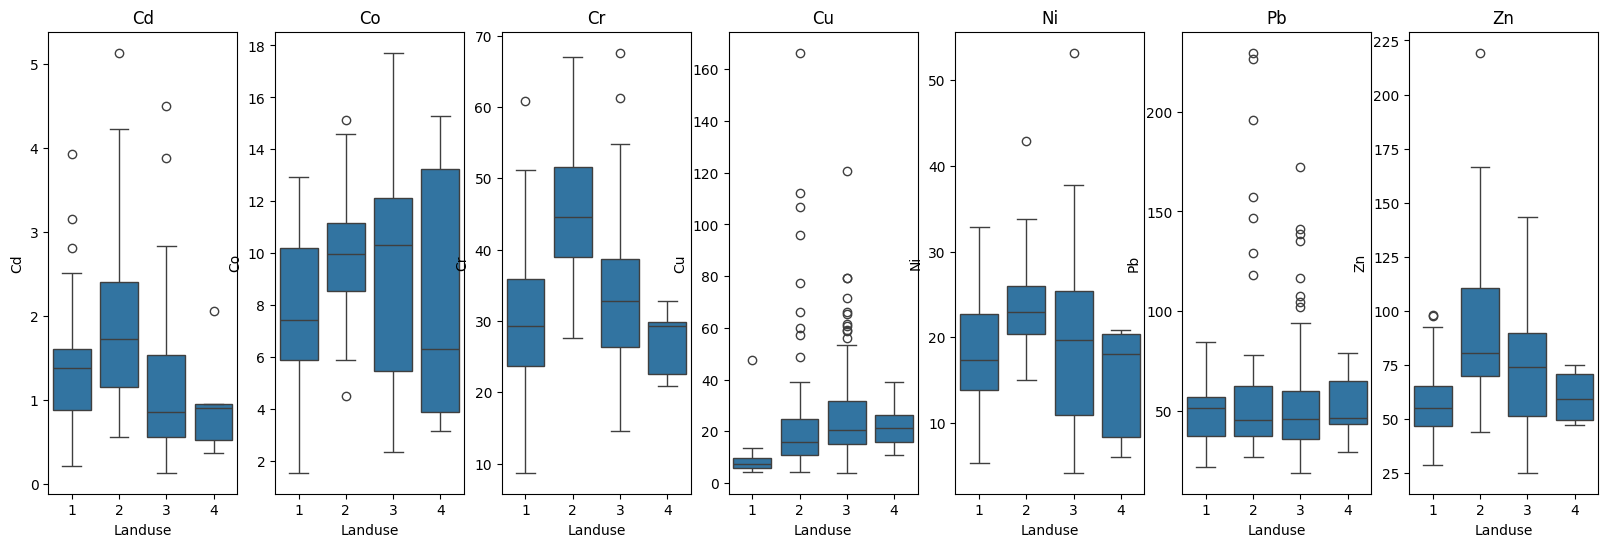

In [15]:
metal_names = jura.columns.values[4:]
fig, ax = plt.subplots(nrows=1, ncols=len(metal_names), figsize=(20, 6))  # To create a grid of plots

for i, name in enumerate(metal_names):
    sns.boxplot(x=jura['Landuse'], y=jura[name], ax=ax[i])
    ax[i].set_title(name)

plt.show()

5. Plot the seven heavy metal concentrations as functions of the rocktype

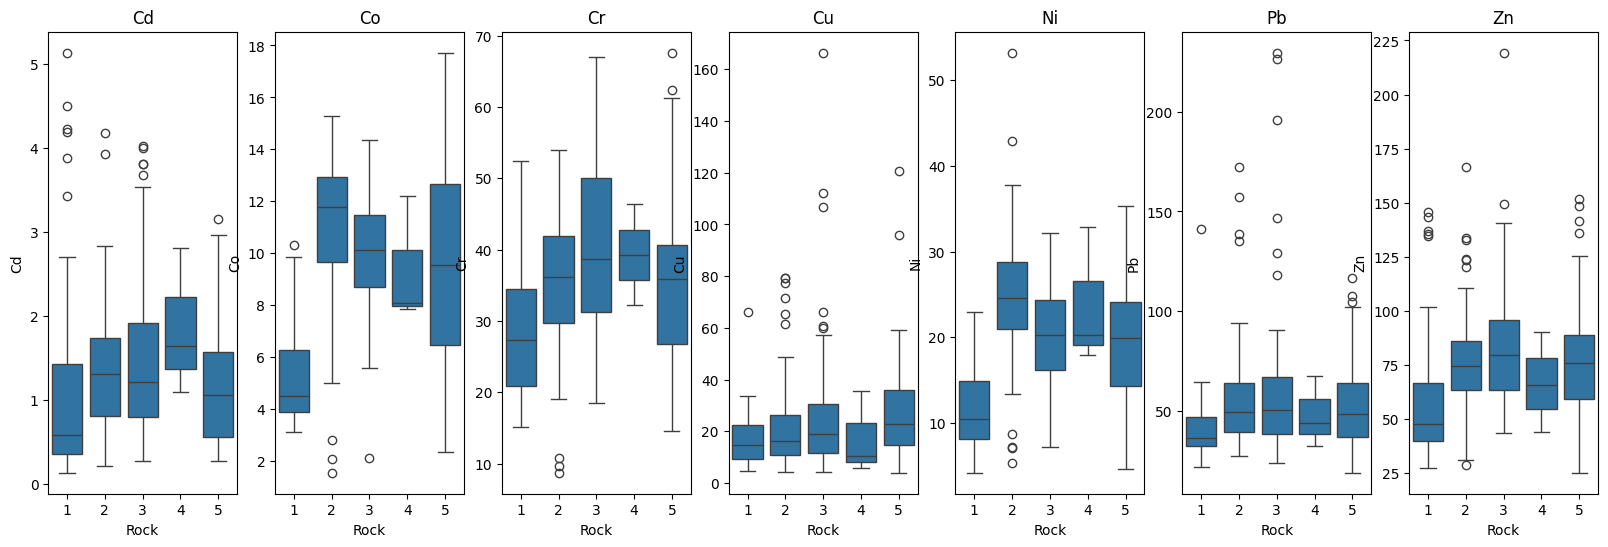

In [17]:
## With a loop, on a single line
metal_names=jura.columns.values[4:]
fig,ax = plt.subplots(nrows=1,ncols=len(metal_names),figsize=(20,6)) ## To create a grid of plots
#for i in range(len(metal_names)):
#    name=metal_names[i]
#    ax[i].scatter(jura['Rock'],jura[name]) 
#    ax[i].set_title(name)
for i, name in enumerate(metal_names):
    sns.boxplot(x=jura['Rock'], y=jura[name], ax=ax[i])
    ax[i].set_title(name)
plt.show()

## Some statistics


We now perform some analysis of variance of the Cobalt concentrations  with Landuse, Rock and their product as factors.

1. First, fit a linear regression model with the Cobalt concentration as a response variable, and with Landuse, Rock and their product as covariates.
 
To perform a linear regression with categorical variables, we use the *ols* function from the *statsmodels* package.

In [19]:
## For linear regressions (using R-style formulas to define regression)
from statsmodels.formula.api import ols

In [20]:
# Fit the regression model, note that we use the C() function to specify that the variables are categorical
model_aov = ols(formula='Co ~  C(Landuse) + C(Rock) + C(Landuse) * C(Rock)', data=jura).fit()
print(model_aov.summary())

                            OLS Regression Results                            
Dep. Variable:                     Co   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     12.78
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           3.45e-25
Time:                        10:29:06   Log-Likelihood:                -613.81
No. Observations:                 259   AIC:                             1264.
Df Residuals:                     241   BIC:                             1328.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

2. Perform an ANOVA analysis on the regression model using the *stats.anova_lm* function from the *statsmodels* package.

In [22]:
## For ANOVA
from statsmodels.api import stats

In [23]:
# Perform anova analysis
anova_table = stats.anova_lm(model_aov)
print(anova_table)

                       df       sum_sq     mean_sq          F        PR(>F)
C(Landuse)            3.0   123.526414   41.175471   5.719424  8.503569e-04
C(Rock)               4.0  1154.120573  288.530143  40.077897  1.011367e-25
C(Landuse):C(Rock)   12.0   314.450031   26.204169   3.639855  4.978314e-05
Residual            241.0  1735.015286    7.199234        NaN           NaN


3. Repeat these two steps on the other concentrations (check the histograms prior to apply a transformation if necessary).


In [ ]:
model_aov_2 = ols(formula='Cd ~  C(Landuse) + C(Rock) + C(Landuse) * C(Rock)', data=jura).fit()
print(model_aov_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     Cd   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     6.426
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.89e-12
Time:                        11:02:31   Log-Likelihood:                -295.64
No. Observations:                 259   AIC:                             627.3
Df Residuals:                     241   BIC:                             691.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [25]:
anova_table_2 = stats.anova_lm(model_aov_2)
print(anova_table_2)

                       df      sum_sq    mean_sq          F        PR(>F)
C(Landuse)            3.0   39.571508  13.190503  21.378913  2.592005e-12
C(Rock)               4.0    0.837260   0.209315   0.339254  8.513216e-01
C(Landuse):C(Rock)   12.0   27.531723   2.294310   3.718574  3.636032e-05
Residual            241.0  148.693765   0.616987        NaN           NaN
